In [243]:
import pandas as pd

disasters = pd.read_csv('1970-2021_DISASTERS.xlsx - emdat data.csv')


## Data gathering & cleaning

### DISASTERS DATASET 

In [244]:
disasters.dropna(how= 'all', inplace= True)

In [242]:
disasters.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [256]:
disasters.columns = disasters.columns.str.lower().str.replace(" ", "_")

columns_to_keep = ['year', 'disaster_subgroup', 'disaster_type', 'country', 'total_deaths', 'total_affected']

disasters = disasters[columns_to_keep]

disasters.drop_duplicates(keep='first', inplace=True)
disasters['total_affected'].fillna(0, inplace=True)  

disasters.head()



,year,disaster_subgroup,disaster_type,country,total_deaths,total_affected
0,1970,Hydrological,Flood,Argentina,36.0,0.0
1,1970,Meteorological,Storm,Australia,13.0,0.0
2,1970,Hydrological,Flood,Benin,NaN,0.0
3,1970,Meteorological,Storm,Bangladesh,300000.0,3648000.0
4,1970,Meteorological,Storm,Bangladesh,17.0,110.0


In [311]:
disasters.to_csv('disasters_clean.csv', index=False)


#### Disasters EDA

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


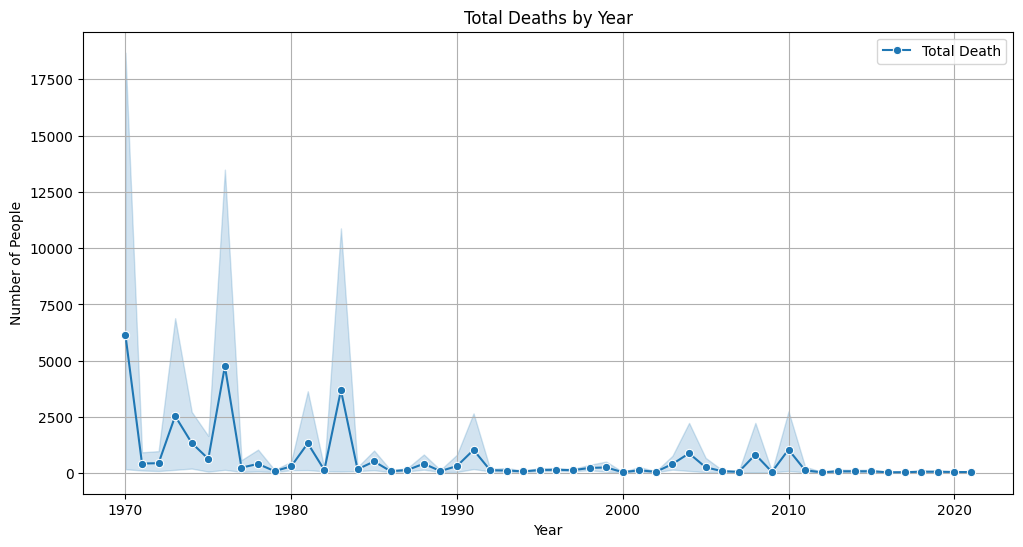

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_deaths', data=disasters, marker='o', label='Total Death')
plt.title('Total Deaths by Year')
plt.ylabel('Number of People')
plt.xlabel('Year')
plt.grid(True)
plt.show()


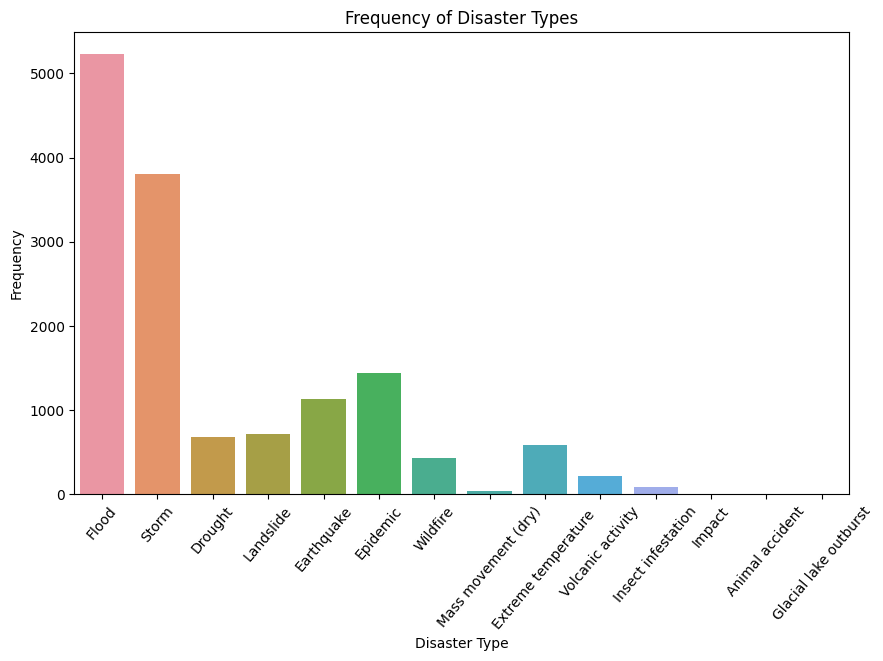

In [262]:
plt.figure(figsize=(10, 6))
sns.countplot(x='disaster_type', data=disasters)
plt.title('Frequency of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=50)
plt.show()


In [272]:
death_by_disaster = disasters.groupby('disaster_type')['total_deaths'].sum()

display(death_by_disaster)

disaster_type
Animal accident               12.0
Drought                   700774.0
Earthquake               1319283.0
Epidemic                  259591.0
Extreme temperature       189101.0
Flood                     330482.0
Glacial lake outburst        250.0
Impact                         0.0
Insect infestation             0.0
Landslide                  40714.0
Mass movement (dry)         2324.0
Storm                     816803.0
Volcanic activity          27135.0
Wildfire                    2963.0
Name: total_deaths, dtype: float64

### WORLD DATA

In [193]:
world_data = pd.read_csv('world-data-2023.csv')

world_data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [194]:
desired_columns = ['Country', 'Capital/Major City', 'Co2-Emissions', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Population']

world_data = world_data[desired_columns]
world_data.columns = world_data.columns.str.lower().str.replace(" ", "_").str.replace("%", "").str.replace("(", "").str.replace(")", "")
disasters.rename(columns={'gross_primary_education_enrollment_': 'gross_primary_education_enrollment', 'gross_tertiary_education_enrollment_':'gross_tertiary_education_enrollment'}, inplace=True)

world_data.head()

,country,capital/major_city,co2-emissions,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,infant_mortality,life_expectancy,population
0,Afghanistan,Kabul,"8,672","$19,101,353,833",104.00%,9.70%,47.9,64.5,"38,041,754"
1,Albania,Tirana,"4,536","$15,278,077,447",107.00%,55.00%,7.8,78.5,"2,854,191"
2,Algeria,Algiers,"150,006","$169,988,236,398",109.90%,51.40%,20.1,76.7,"43,053,054"
3,Andorra,Andorra la Vella,469,"$3,154,057,987",106.40%,NaN,2.7,NaN,"77,142"
4,Angola,Luanda,"34,693","$94,635,415,870",113.50%,9.30%,51.6,60.8,"31,825,295"


#### World data EDA

### Mental health - Depression


In [286]:
import pandas as pd


depression = pd.read_excel('Mental Health Depression disorder Data.xlsx')

depression.drop(columns={'Drug use disorders (%)', "Alcohol use disorders (%)"})
depression.columns = depression.columns.str.lower().str.replace(" ", "").str.replace("%", "").str.replace("(", "").str.replace(")", "")

depression.dtypes

entity                  object
code                    object
year                     int64
schizophrenia          float64
bipolardisorder        float64
eatingdisorders        float64
anxietydisorders       float64
drugusedisorders       float64
depression             float64
alcoholusedisorders    float64
dtype: object

In [312]:
depression.to_csv('depression_clean.csv', index=False)


#### Mental health EDA


c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


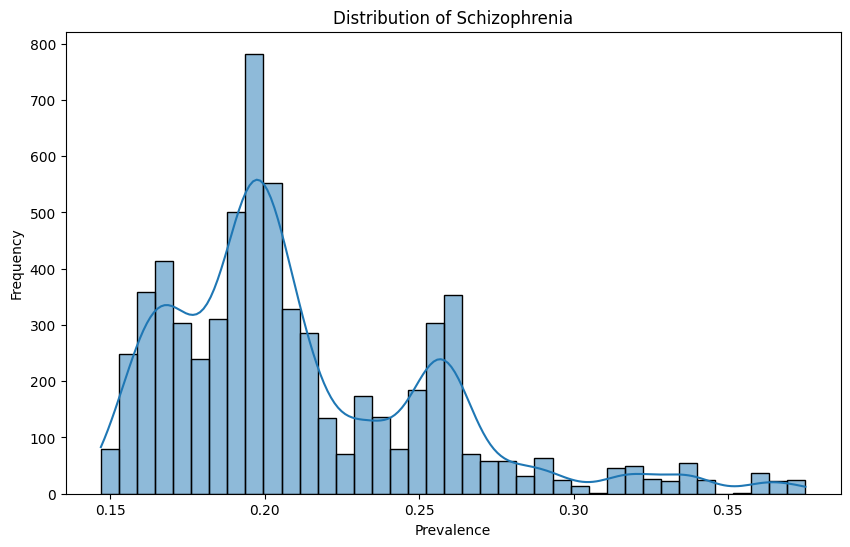

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


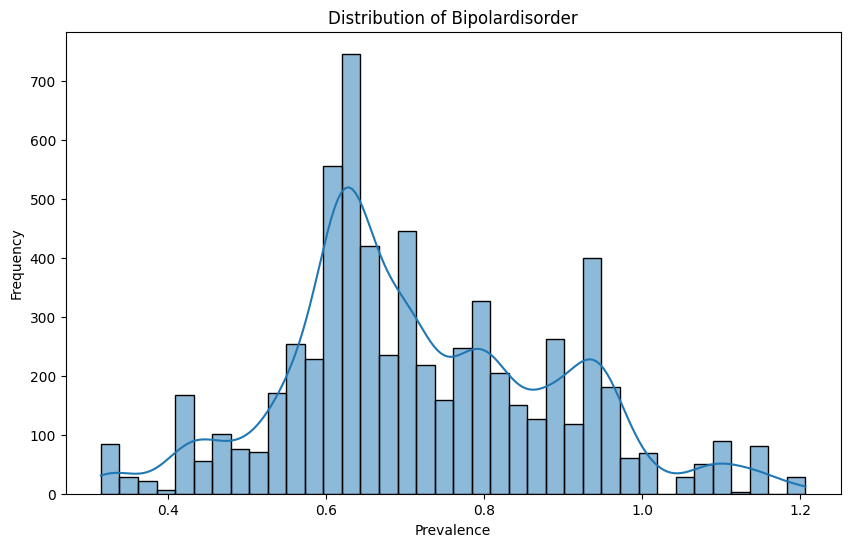

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


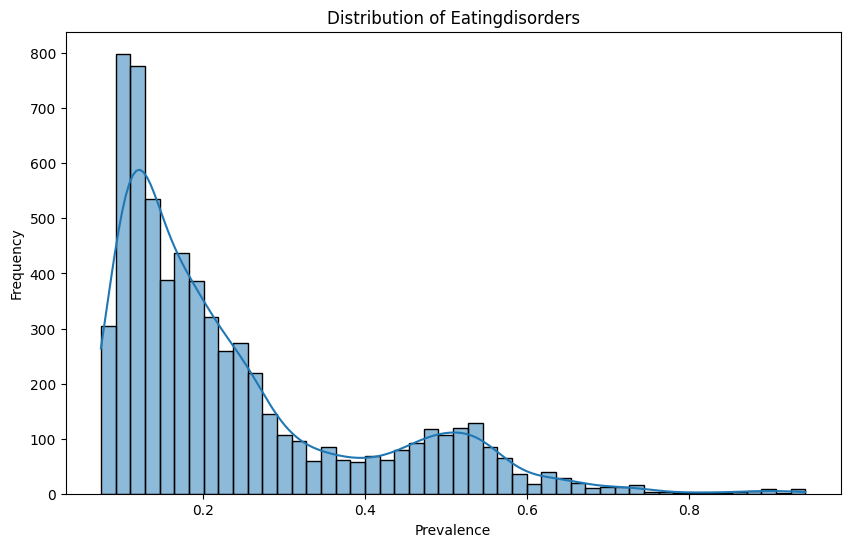

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


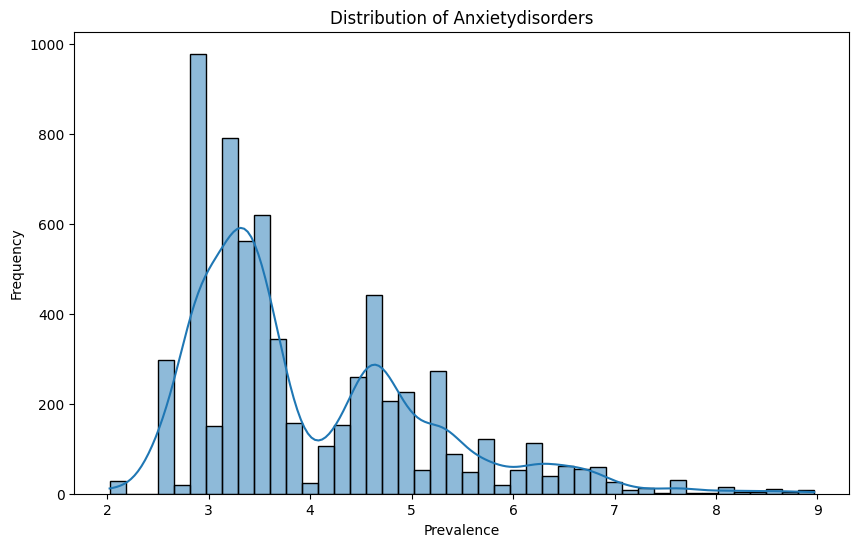

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


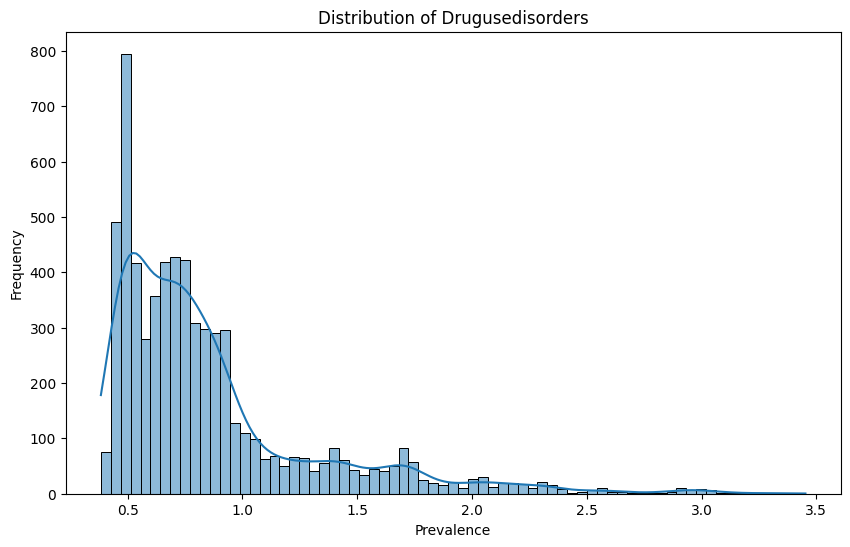

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


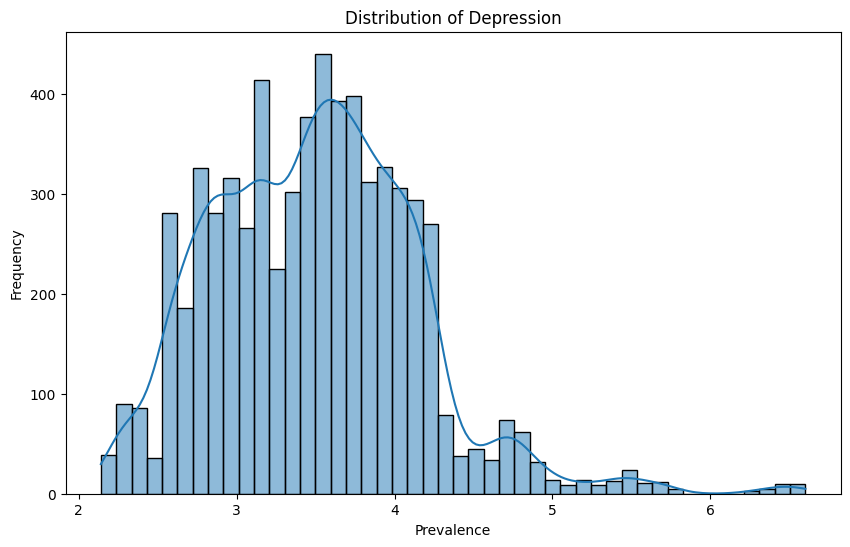

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


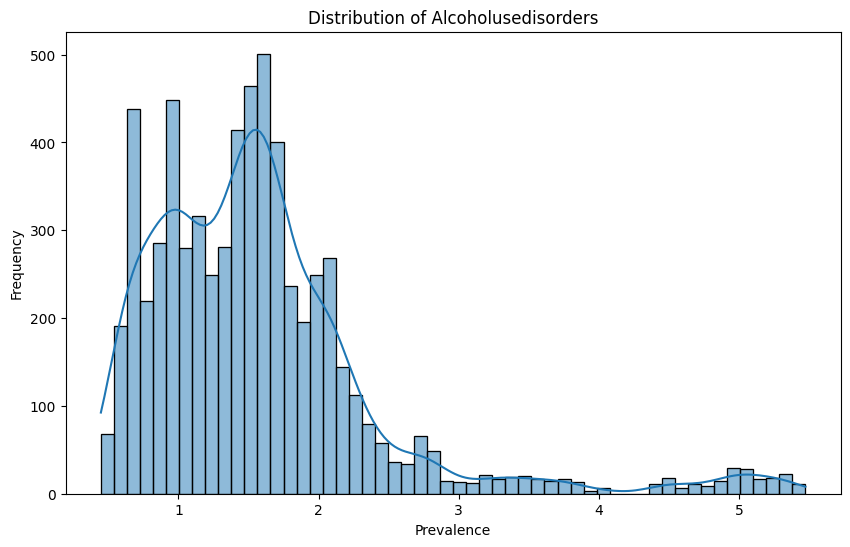

In [276]:
disorders = ['schizophrenia', 'bipolardisorder', 'eatingdisorders', 'anxietydisorders', 'drugusedisorders', 'depression', 'alcoholusedisorders']

for disorder in disorders:
    plt.figure(figsize=(10, 6))
    sns.histplot(depression[disorder], kde=True)
    plt.title(f'Distribution of {disorder.capitalize()}')
    plt.xlabel('Prevalence')
    plt.ylabel('Frequency')
    plt.show()

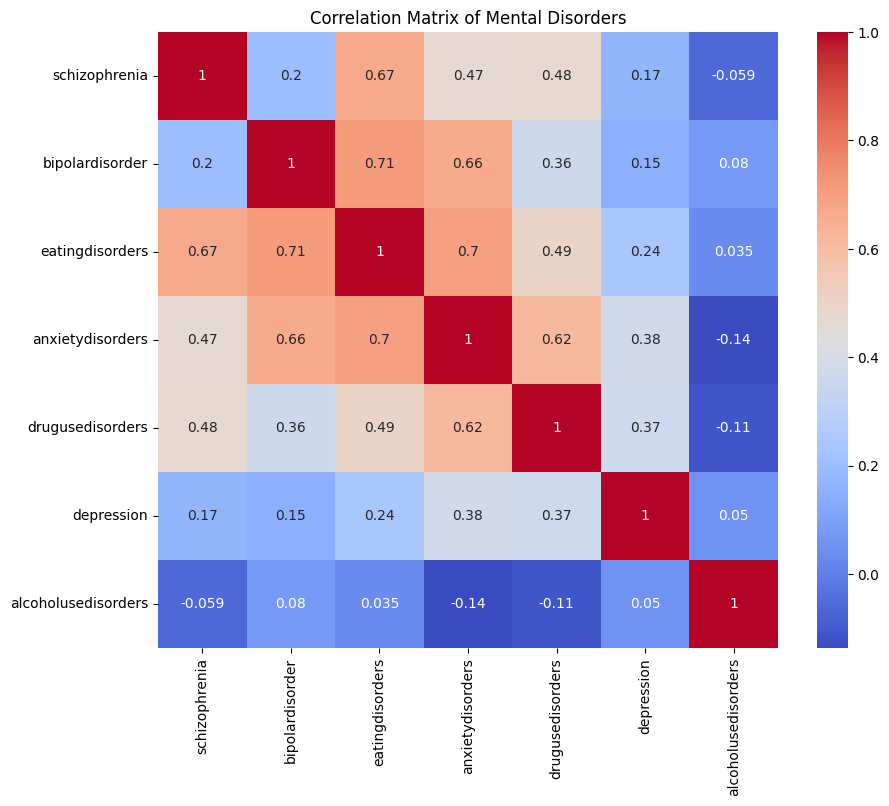

In [278]:
plt.figure(figsize=(10, 8))
sns.heatmap(depression[disorders].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Mental Disorders')
plt.show()

In [287]:
print(type(disorders))


<class 'list'>


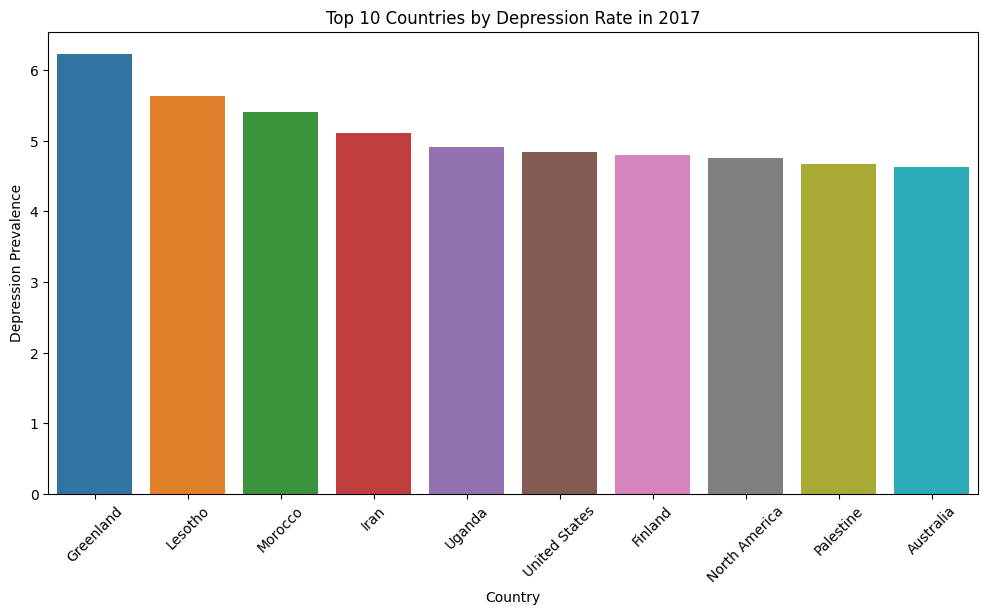

In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'depression'
# Example: Top 10 countries with highest depression rates in the latest year available
latest_year = depression['year'].max()  # Use the DataFrame to get the maximum year
top_countries = depression[depression['year'] == latest_year].sort_values(by='depression', ascending=False).head(10)  # Sort and get top 10

plt.figure(figsize=(12, 6))
sns.barplot(x='entity', y='depression', data=top_countries)
plt.title('Top 10 Countries by Depression Rate in ' + str(latest_year))
plt.xlabel('Country')
plt.ylabel('Depression Prevalence')
plt.xticks(rotation=45)
plt.show()


### Climate Anxiety

In [196]:
anxiety = pd.read_spss('Climate Anxiety-3.SAV')

anxiety.columns

Index(['Respondent_Serial', 'language', 'country', 'D1', 'D2', 'D3', 'Q1',
       'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2',
       'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2',
       'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'yyyymmdd',
       'AgeGender', 'regionAustralia', 'regionUS', 'regionUK', 'regionIndia',
       'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal',
       'regionBrazil', 'regionFrance', 'weight'],
      dtype='object')

In [197]:
columns_to_keep = ['country', 'D1', 'D2', 'D3', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9']

anxiety = anxiety[columns_to_keep]

anxiety.columns


Index(['country', 'D1', 'D2', 'D3', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4',
       'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q2_11', 'Q2_12',
       'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6',
       'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6',
       'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6',
       'Q8_7', 'Q8_8', 'Q8_9'],
      dtype='object')

In [198]:
import pandas as pd

# Assuming the DataFrame 'anxiety' is already loaded
# For example, if you need to load it from a CSV:
# anxiety = pd.read_csv('path_to_your_survey_data.csv')

# Mapping dictionaries
mapping_q1 = {
    'not worried': 0,
    'a little': 1,
    'moderately': 2,
    'very': 3,
    'extremely': 4,
    'Prefer not to say': None
}

mapping_q6_q8 = {
    'not at all': 0,
    'a little': 1,
    'moderately': 2,
    'very': 3,
    'extremely': 4,
    'Prefer not to say': None
}

mapping_yes_no = {
    'yes': 1,
    'no': 0,
    'Prefer not to say': None
}

# Apply mappings to Q1, Q6, and all Q8 sub-questions
anxiety['Q1'] = anxiety['Q1'].astype(str).map(mapping_q1)
anxiety['Q6'] = anxiety['Q6'].astype(str).map(mapping_q6_q8)

# For Q8 sub-questions
for i in range(1, 10):
    col_name = f'Q8_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_q6_q8)

# For Q2 sub-questions (yes/no)
for i in range(1, 15):
    col_name = f'Q2_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_yes_no)

# Q3, Q5 and all Q4 and Q7 sub-questions are yes/no type
anxiety['Q3'] = anxiety['Q3'].astype(str).map(mapping_yes_no)
anxiety['Q5'] = anxiety['Q5'].astype(str).map(mapping_yes_no)

for i in range(1, 8):
    col_name = f'Q4_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_yes_no)

for i in range(1, 10):
    col_name = f'Q7_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_yes_no)

# Optionally, save the modified DataFrame
# anxiety.to_csv('path_to_your_modified_survey_data.csv', index=False)

# Print a summary to check everything
print("Data types and unique values check:")
for col in anxiety.columns:
    print(f"{col}: {anxiety[col].dtype}, unique values: {anxiety[col].unique()}")



Data types and unique values check:
country: category, unique values: ['France', 'Philippines', 'Australia', 'India', 'Finland', 'Portugal', 'United Kingdom', 'Brazil', 'Nigeria', 'United States']
Categories (10, object): ['Australia', 'Brazil', 'Finland', 'France', ..., 'Philippines', 'Portugal', 'United Kingdom', 'United States']
D1: float64, unique values: [22. 25. 24. 20. 18. 21. 23. 19. 17. 16.]
D2: category, unique values: ['man', 'woman']
Categories (2, object): ['man', 'woman']
D3: category, unique values: ['France: South', 'Philippines: Metro Luzon Urban Beltway/ North..., 'Australia: South Australia', 'India: West India', 'India: South India', ..., 'United States: Midwest', 'Nigeria: South South', 'Portugal: Algarve', 'Australia: Northern Territory', 'Portugal: Alentejo']
Length: 50
Categories (50, object): ['Australia: Australian Capital Territory', 'Australia: New South Wales', 'Australia: Northern Territory', 'Australia: Queensland', ..., 'United States: Midwest', 'United 

In [313]:
anxiety.to_csv('anxiety_clean.csv', index=False)


#### Survey EDA

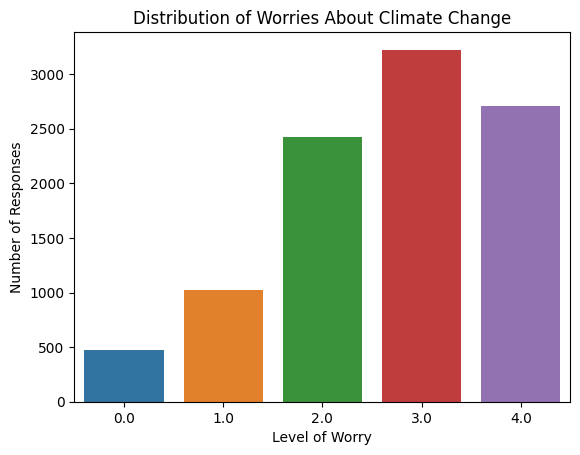

In [299]:
sns.countplot(x='Q1', data=anxiety) 
plt.title('Degree of Worries About Climate Change')
plt.xlabel('Level of Worry')
plt.ylabel('Number of Responses')
plt.show()


In [301]:
anxiety.describe()


,D1,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q7_9,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9
count,10000.000000,9852.000000,9842.000000,9823.000000,9829.000000,9846.000000,9750.000000,9815.000000,9817.000000,9822.000000,...,9329.000000,9498.000000,9610.000000,9674.000000,9665.000000,9641.000000,9623.000000,9601.000000,9492.000000,9656.000000
mean,21.228400,2.676715,0.681366,0.521327,0.633635,0.689519,0.315795,0.585023,0.515229,0.466300,...,0.630829,1.628448,1.667950,1.841741,1.338231,1.831553,1.160969,1.675346,1.629899,1.157933
std,2.551369,1.124173,0.465971,0.499570,0.481835,0.462714,0.464855,0.492743,0.499793,0.498888,...,0.482606,1.205520,1.279188,1.240896,1.147148,1.261562,1.154265,1.305639,1.243965,1.130077
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,21.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,23.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [216]:
# ! pip install praw
# ! pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 640.0 kB/s eta 0:00:01
   ------- -------------------------------- 112.6/626.3 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/626.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
import praw
from textblob import TextBlob
import matplotlib.pyplot as plt

# Authenticate to Reddit
reddit = praw.Reddit(
    client_id='mDnQ52uK8bEWLO9kr6wnUw',
    client_secret='wqivTcktUmwokeoRUVhwd8TYmICNeQ',
    user_agent='reddit_sentiment_analysis',  # e.g., 'reddit_sentiment_analysis'
    username='antique-incident-560',
    password='Kille1995!'
)

# Function to fetch comments or posts
def get_reddit_comments(subreddit, keyword, limit=1000):
    comments = []
    for submission in reddit.subreddit(subreddit).search(keyword, limit=limit):
        submission.comments.replace_more(limit=None)  # fetch all comments
        for comment in submission.comments.list():
            comments.append(comment.body)
    return comments

# Fetch comments
comments = get_reddit_comments('environment', 'climate change')


### Web scrapping

In [219]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Since a page might contain multiple tables, you may need to check which one you need by indexing
tables = pd.read_html(str(soup))

# Assuming the table you need is the first one (index 0)
co2_emissions = tables[0]

# Display the DataFrame
print(co2_emissions)

# Optionally, save the table to a CSV file
#co2_emissions.to_csv('CO2_emissions_by_country.csv', index=False)


          Country/territory Fossil CO2 emissions (ktCO2/year)              \
          Country/territory                              1970        1990   
0                     Aruba                              25.2       189.3   
1               Afghanistan                            1734.1      2896.5   
2                    Angola                            8948.2     11288.8   
3                  Anguilla                               2.2         6.1   
4                   Albania                            4848.8      6647.4   
..                      ...                               ...         ...   
207                Zimbabwe                            9529.6     17387.1   
208                   World                        15825424.0  22516769.0   
209                    EU27                         3488583.0   3793290.0   
210  International Aviation                          168603.0    258270.0   
211  International Shipping                          353846.0    370696.0   

C:\Users\kciss\AppData\Local\Temp\ipykernel_42588\1825057512.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


In [220]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_air_pollution'

html_content = requests.get(url).text

soup = BeautifulSoup(html_content, "html.parser")

tables = pd.read_html(str(soup))

air_pollution = tables[0]  # Adjust the index as needed based on visual inspection of `tables`

print(air_pollution)

#air_pollution.to_csv('air_pollution_by_country.csv', index=False)


     Rank                     Country/Region  2022  2021  2020  2019  2018  \
0       1                               Chad  89.7  75.9    --    --    --   
1       2                               Iraq  80.1  49.7    --  39.6    --   
2       3                           Pakistan  70.9  66.8    59  65.8  74.3   
3       4                            Bahrain  66.6  49.8  39.7  46.8  59.8   
4       5                         Bangladesh  65.8  76.9  77.1  83.3  97.1   
..    ...                                ...   ...   ...   ...   ...   ...   
126   127  Bonaire, Saint Eustatius and Saba   3.3   5.1    --    --    --   
127   128                            Bermuda   3.0    --    --    --    --   
128   129                U.S. Virgin Islands   2.9   4.5   3.7   3.5    --   
129   130                   French Polynesia   2.5    --    --    --    --   
130   131                               Guam   1.3    --    --    --    --   

     Population  
0      17179740  
1      43533592  
2     231

C:\Users\kciss\AppData\Local\Temp\ipykernel_42588\877484637.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


### CO2 emissions cleaning

In [224]:
emissions = pd.read_csv('CO2_emissions_by_country.csv')

emissions.isna().sum()

Country/territory                      0
Fossil CO2 emissions (ktCO2/year)      0
Fossil CO2 emissions (ktCO2/year).1    0
Fossil CO2 emissions (ktCO2/year).2    0
Fossil CO2 emissions (ktCO2/year).3    0
Fossil CO2 emissions (ktCO2/year).4    0
Per capita (tCO2/year)                 2
% of world                             0
Change (1990=100%)                     0
dtype: int64

In [282]:
emissions.head()

,Country/territory,Fossil CO2 emissions (ktCO2/year),Fossil CO2 emissions (ktCO2/year).1,Fossil CO2 emissions (ktCO2/year).2,Fossil CO2 emissions (ktCO2/year).3,Fossil CO2 emissions (ktCO2/year).4,Per capita (tCO2/year),% of world,Change (1990=100%)
0,Country/territory,1970.0,1990.0,2005.0,2017.0,2022.0,2022.00,2022,2022
1,Aruba,25.2,189.3,358.2,426.8,455.1,4.25,0.001%,240.4%
2,Afghanistan,1734.1,2896.5,1333.8,8546.9,5675.8,0.14,0.015%,196.0%
3,Angola,8948.2,11288.8,15964.1,26137.4,20185.7,0.58,0.052%,178.8%
4,Anguilla,2.2,6.1,13.7,29.1,22.8,1.52,0.000%,372.5%


In [296]:
emissions.columns = [
    'countryterritory', '1970',
    '1990', '2005',
    '2017', '2022',
    'per_capita_tco2year', 'perc_of_world', 'change'
]

In [297]:
emissions = emissions.drop(emissions.index[0])
emissions.head()

,countryterritory,1970,1990,2005,2017,2022,per_capita_tco2year,perc_of_world,change
1,Aruba,25.2,189.3,358.2,426.8,455.1,4.25,0.001%,240.4%
2,Afghanistan,1734.1,2896.5,1333.8,8546.9,5675.8,0.14,0.015%,196.0%
3,Angola,8948.2,11288.8,15964.1,26137.4,20185.7,0.58,0.052%,178.8%
4,Anguilla,2.2,6.1,13.7,29.1,22.8,1.52,0.000%,372.5%
5,Albania,4848.8,6647.4,4149.4,5349.3,4486.2,1.52,0.012%,67.5%


In [314]:
emissions.to_csv('emissions_clean.csv', index=False)


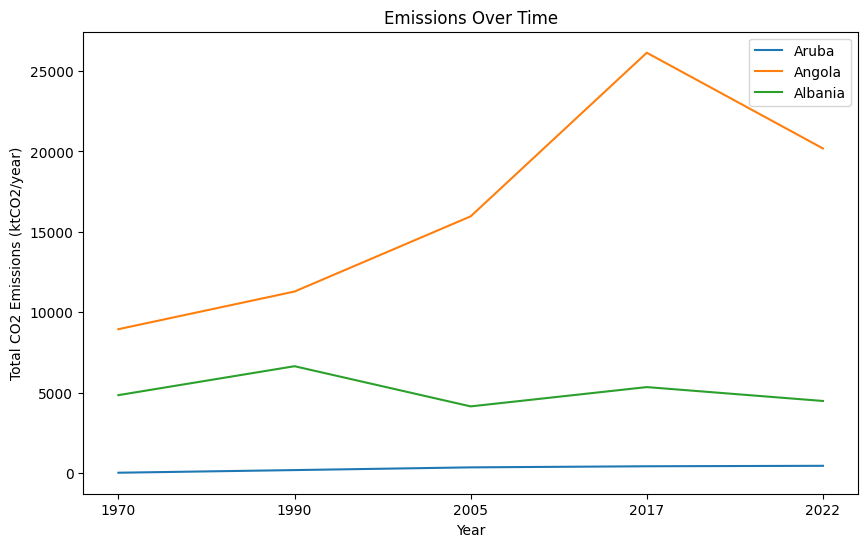

In [302]:
# Plot emissions over years for a few countries
plt.figure(figsize=(10, 6))
for country in ['Aruba', 'Angola', 'Albania']:  # Select a few countries for example
    subset = emissions[emissions['countryterritory'] == country]
    plt.plot(['1970', '1990', '2005', '2017', '2022'], subset[['1970', '1990', '2005', '2017', '2022']].iloc[0], label=country)

plt.title('Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (ktCO2/year)')
plt.legend()
plt.show()


c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


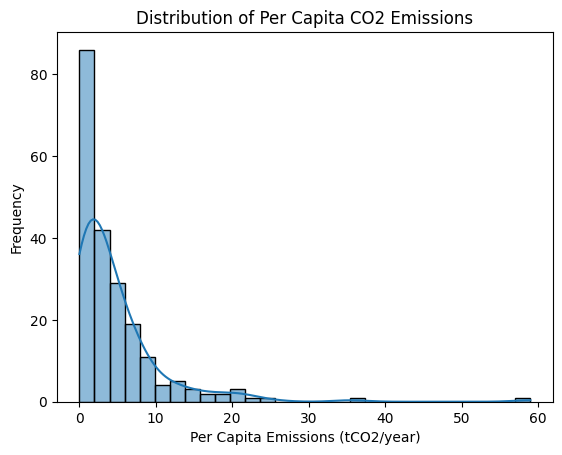

In [304]:
sns.histplot(emissions['per_capita_tco2year'], bins=30, kde=True)
plt.title('Distribution of Per Capita CO2 Emissions')
plt.xlabel('Per Capita Emissions (tCO2/year)')
plt.ylabel('Frequency')
plt.show()

In [308]:
# List of entries to exclude
exclude_countries = ['World', 'EU27', 'International Aviation', 'International Shipping']

# Filter the DataFrame
emissions = emissions[~emissions['countryterritory'].isin(exclude_countries)]

In [309]:
latest_year_column = str(max(int(col) for col in emissions.columns if col.isdigit())) 

# Sort the DataFrame based on the latest year's emissions and take the top 10
top_countries = emissions.sort_values(by=latest_year_column, ascending=False).head(10)

# Print top 10 countries for verification
print(top_countries[['countryterritory', latest_year_column]])

    countryterritory        2022
36             China  12667428.4
197    United States   4853780.2
90             India   2693034.1
160           Russia   1909039.3
99             Japan   1082645.4
89         Indonesia    692236.1
92              Iran    686415.7
50           Germany    673595.3
106      South Korea    635503.0
162     Saudi Arabia    607907.5


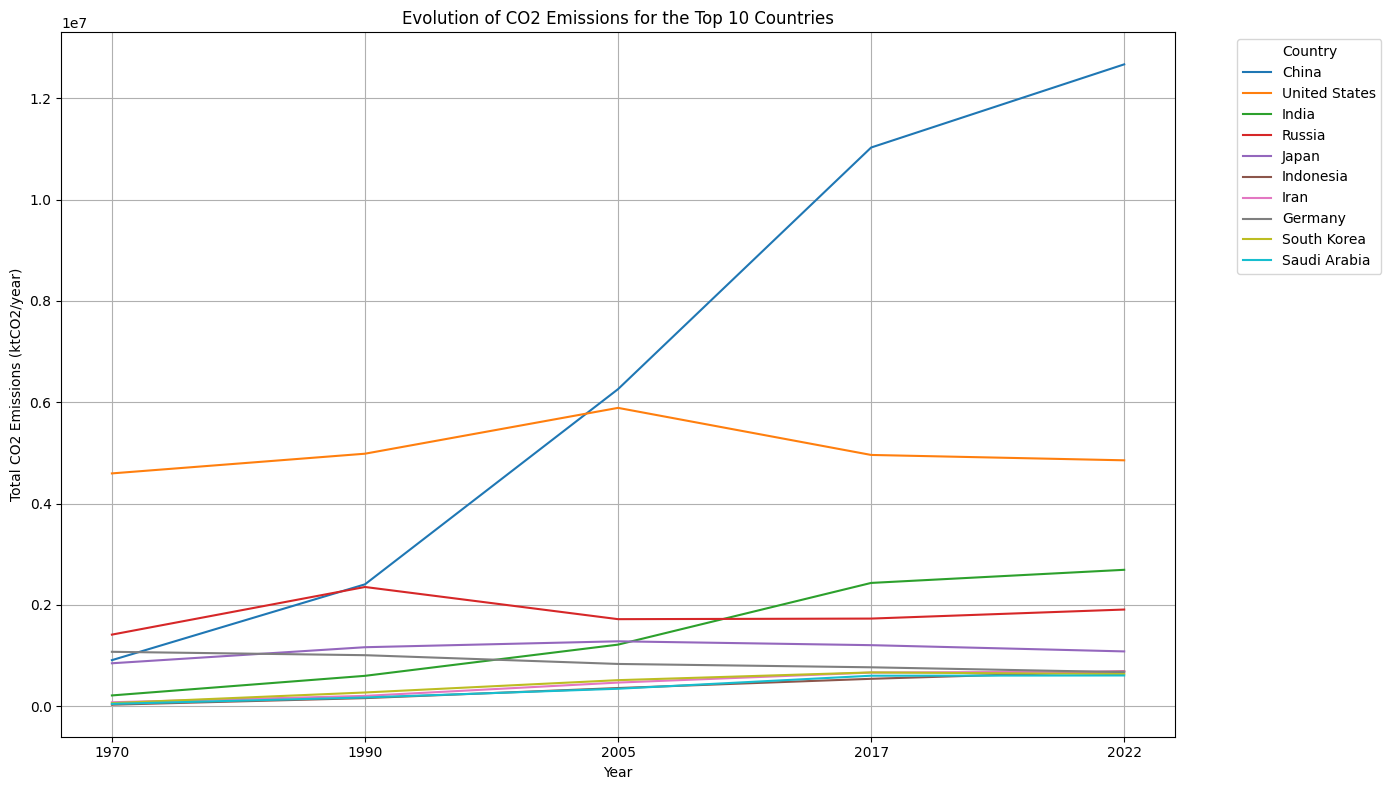

In [310]:
# List of years to plot, which are the columns representing years in your DataFrame
years = [col for col in emissions.columns if col.isdigit()]

# Plotting each country's emissions over time
plt.figure(figsize=(14, 8))
for index, row in top_countries.iterrows():
    plt.plot(years, row[years], label=row['countryterritory'])

plt.title('Evolution of CO2 Emissions for the Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (ktCO2/year)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()
